In [ ]:
#IMPORTACION DEL ARCHIVO CSV
import pandas as pd

# URL en formato 'raw' para que Pandas lo lea como CSV correctamente
url = "https://raw.githubusercontent.com/kncag/Telecom-primero/main/telecom_data_final.csv"

# 1. Cargar el archivo CSV directamente desde GitHub
df = pd.read_csv(url)

# 2. Verificar las dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

# 3. Revisar que los tipos de datos estén correctos
df.info()

# Mostrar las primeras 5 filas para confirmar
df.head()

Dimensiones del dataset: (7043, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Fuga                     7043 non-null   int64  
 2   Genero                   7043 non-null   object 
 3   Adulto_Mayor             7043 non-null   int64  
 4   Pareja                   7043 non-null   int64  
 5   Dependientes             7043 non-null   int64  
 6   Meses_Contrato           7043 non-null   int64  
 7   Servicio_Telefonico      7043 non-null   int64  
 8   Multiples_Lineas         7043 non-null   int64  
 9   Servicio_Internet        7043 non-null   object 
 10  Seguridad_Online         7043 non-null   int64  
 11  Respaldo_Online          7043 non-null   int64  
 12  Proteccion_Dispositivo   7043 non-null   int64  
 13  Soporte_Tecnico          7043 non-null   i

,ID_Cliente,Fuga,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,1 Año,1,Mailed check,65.6,593.30,2.19,4
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mensual,0,Mailed check,59.9,542.40,2.00,3
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Optica,...,0,0,0,Mensual,1,Electronic check,73.9,280.85,2.46,2
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Optica,...,0,1,1,Mensual,1,Electronic check,98.0,1237.85,3.27,5
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Optica,...,1,1,0,Mensual,1,Mailed check,83.9,267.40,2.80,3


In [5]:
#HACEMOS DROP DEL ID_Cliente
# 1. Verificamos las columnas antes de eliminar
print(f"Columnas antes: {df.shape[1]}")

# 2. Eliminamos la columna del identificador único
# Si tu columna está en español, usa: columns=['ID_Cliente']
# Si tu columna sigue en inglés original, usa: columns=['customerID']
df = df.drop(columns=['ID_Cliente'])

# 3. Verificamos que se haya eliminado correctamente
print(f"Columnas después de eliminar el ID: {df.shape[1]}")
df.head()

Columnas antes: 23
Columnas después de eliminar el ID: 22


,Fuga,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,1,1,0,1 Año,1,Mailed check,65.6,593.30,2.19,4
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,1,Mensual,0,Mailed check,59.9,542.40,2.00,3
2,1,Masculino,0,0,0,4,1,0,Fibra Optica,0,...,0,0,0,Mensual,1,Electronic check,73.9,280.85,2.46,2
3,1,Masculino,1,1,0,13,1,0,Fibra Optica,0,...,0,1,1,Mensual,1,Electronic check,98.0,1237.85,3.27,5
4,1,Femenino,1,1,0,3,1,0,Fibra Optica,0,...,1,1,0,Mensual,1,Mailed check,83.9,267.40,2.80,3


In [6]:
#ENCODING
# 1. Aplicar One-Hot Encoding
# pd.get_dummies detecta automáticamente las columnas de tipo texto ('object') y las transforma.
# Usamos drop_first=True para evitar la "trampa de las variables ficticias" (multicolinealidad).
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Convertir los valores booleanos (True/False) generados a enteros (1/0)
# Esto es opcional en algunas versiones de Pandas, pero es una excelente práctica para ML
df_encoded = df_encoded.astype(int)

# 3. Verificar el impacto de la transformación
print(f"Dimensiones ANTES del encoding: {df.shape}")
print(f"Dimensiones DESPUÉS del encoding: {df_encoded.shape}")

# Visualizar las nuevas columnas generadas
df_encoded.head()

Dimensiones ANTES del encoding: (7043, 22)
Dimensiones DESPUÉS del encoding: (7043, 26)


,Fuga,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Cuentas_Diarias,Total_Servicios,Genero_Masculino,Servicio_Internet_Fibra Optica,Servicio_Internet_Ninguno,Contrato_2 Años,Contrato_Mensual,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,2,4,0,0,0,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,2,3,1,0,0,0,1,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,2,2,1,1,0,0,1,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,3,5,1,1,0,0,1,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,2,3,0,1,0,0,1,0,0,1


In [8]:
#Verifica proporcion de cancelaciones
# 1. Ver la cantidad exacta de clientes (Conteo absoluto)
# Nota: Si en tu CSV la columna se llama 'Fuga' o 'Churn', asegúrate de usar el nombre correcto.
print("--- Conteo de Clientes ---")
conteo_absoluto = df['Fuga'].value_counts()
print(conteo_absoluto)

# 2. Calcular la proporción (Porcentaje) usando normalize=True
print("\n--- Proporción de Evasión (%) ---")
proporcion = df['Fuga'].value_counts(normalize=True) * 100
print(proporcion.round(2))

--- Conteo de Clientes ---
Fuga
0    5174
1    1869
Name: count, dtype: int64

--- Proporción de Evasión (%) ---
Fuga
0    73.46
1    26.54
Name: proportion, dtype: float64


In [9]:
#BALANCEO DE CLASES
# Importar la herramienta SMOTE
# (Si te da error porque no tienes la librería, ejecuta en otra celda: !pip install imbalanced-learn)
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separar el dataset en características (X) y etiqueta (y)
# (Si tu columna de evasión se llama 'Churn', cambia 'Fuga' por 'Churn')
X = df_encoded.drop(columns=['Fuga'])
y = df_encoded['Fuga']

# 2. Inicializar y aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. Verificar el balanceo
print("--- ANTES de SMOTE ---")
print(y.value_counts())

print("\n--- DESPUÉS de SMOTE ---")
print(y_resampled.value_counts())

# Opcional: Crear un nuevo DataFrame final y perfectamente balanceado
df_balanceado = pd.concat([X_resampled, y_resampled], axis=1)
print(f"\nNuevas dimensiones del dataset: {df_balanceado.shape}")

--- ANTES de SMOTE ---
Fuga
0    5174
1    1869
Name: count, dtype: int64

--- DESPUÉS de SMOTE ---
Fuga
0    5174
1    5174
Name: count, dtype: int64

Nuevas dimensiones del dataset: (10348, 26)


In [10]:
# ESTANDARIZACION - NORAMALIZACION
from sklearn.preprocessing import MinMaxScaler

# 1. Identificamos las columnas que tienen números grandes (las continuas)
# Las demás ya son 0 y 1 gracias al One-Hot Encoding, así que no necesitan escala.
columnas_a_escalar = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

# 2. Inicializamos el escalador
# MinMaxScaler transformará todos los valores grandes a una escala proporcional entre 0 y 1
escalador = MinMaxScaler()

# 3. Aplicamos la transformación solo a esas columnas (sobre nuestro dataset X original o X_resampled)
# Aquí lo aplicamos sobre X (tus características antes o después de SMOTE)
X[columnas_a_escalar] = escalador.fit_transform(X[columnas_a_escalar])

# Si aplicaste SMOTE en el paso anterior y lo guardaste en X_resampled,
# la buena práctica es escalar también X_resampled:
# X_resampled[columnas_a_escalar] = escalador.fit_transform(X_resampled[columnas_a_escalar])

# 4. Verificamos el resultado
print("Estadísticas después de la normalización (Todo está entre 0 y 1):")
print(X[columnas_a_escalar].describe().round(3).loc[['min', 'max', 'mean']])

Estadísticas después de la normalización (Todo está entre 0 y 1):
      Meses_Contrato  Cargo_Mensual  Cargo_Total  Cuentas_Diarias
min             0.00          0.000        0.000            0.000
max             1.00          1.000        1.000            1.000
mean            0.45          0.463        0.262            0.535


🎯 Correlación y Selección de Variables

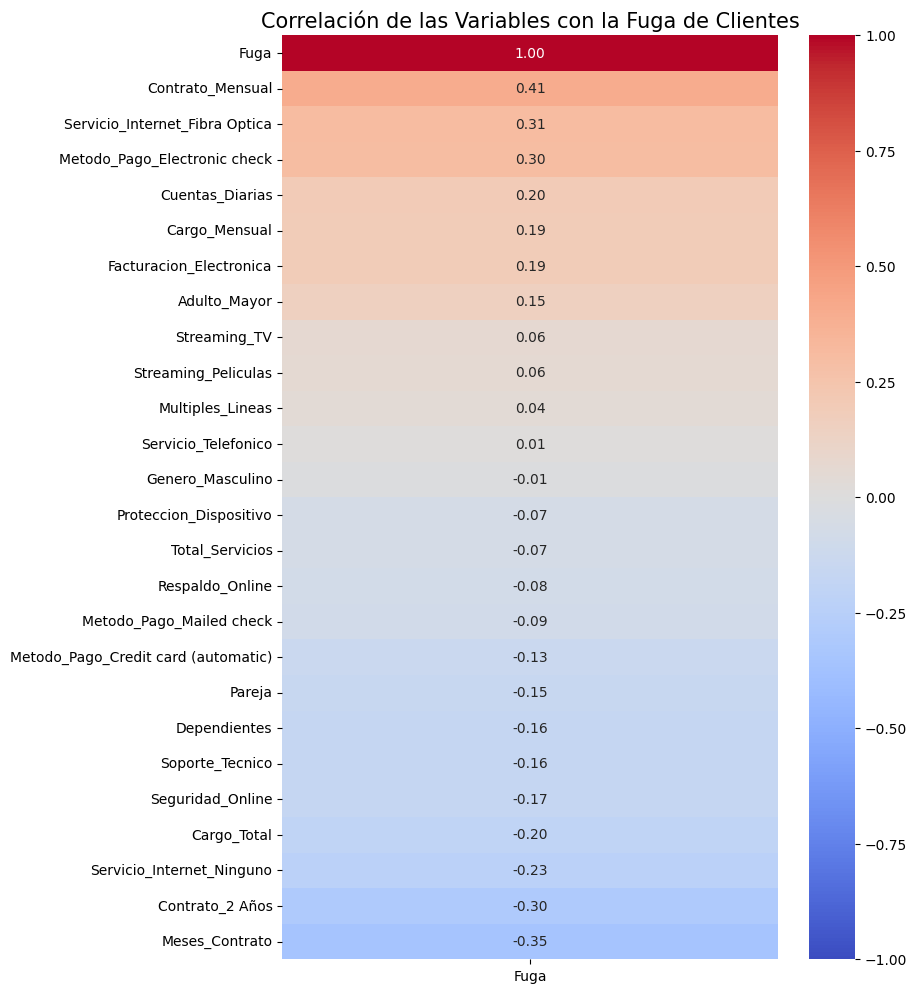

In [11]:
#Análisis de Correlación
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de correlación
# Usamos el dataframe que ya tiene el encoding y el balanceo (ej. df_balanceado o df_encoded)
corr_matrix = df_encoded.corr()

# 2. Filtrar solo la correlación con la variable objetivo (Fuga)
# Ordenamos de forma descendente para ver qué influye más
fuga_corr = corr_matrix[['Fuga']].sort_values(by='Fuga', ascending=False)

# 3. Visualizar con un Heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(fuga_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlación de las Variables con la Fuga de Clientes', fontsize=15)
plt.show()

/tmp/ipython-input-568/2328217275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuga', y='Meses_Contrato', data=df_encoded, ax=axes[0], palette='magma')
/tmp/ipython-input-568/2328217275.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuga', y='Cargo_Total', data=df_encoded, ax=axes[1], palette='magma')


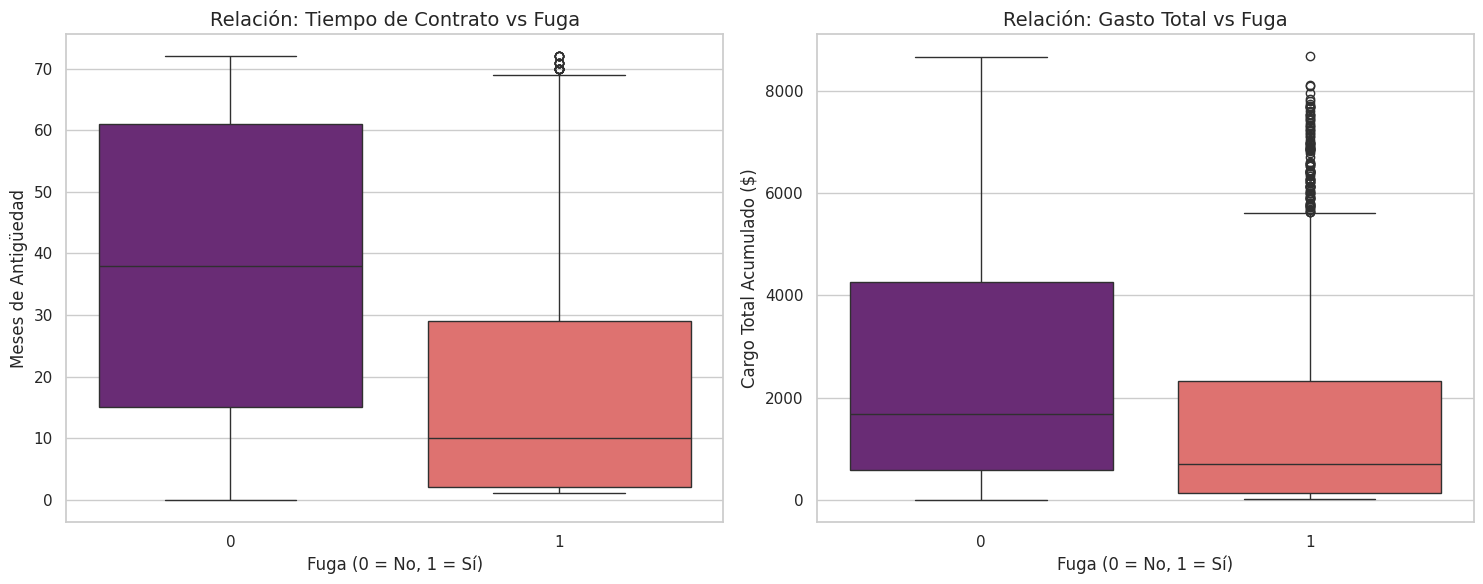

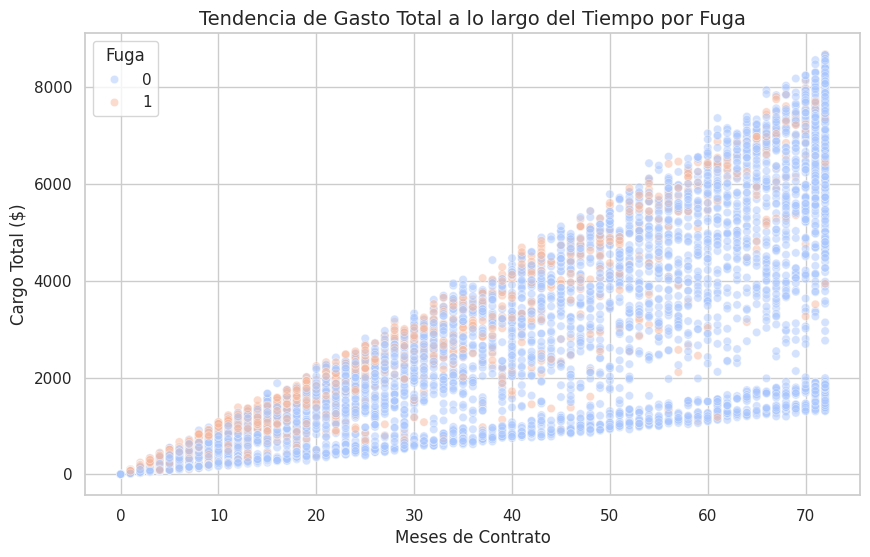

In [12]:
# Análisis dirigido
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Tiempo de Contrato (Antigüedad) vs Cancelación
sns.boxplot(x='Fuga', y='Meses_Contrato', data=df_encoded, ax=axes[0], palette='magma')
axes[0].set_title('Relación: Tiempo de Contrato vs Fuga', fontsize=14)
axes[0].set_xlabel('Fuga (0 = No, 1 = Sí)')
axes[0].set_ylabel('Meses de Antigüedad')

# 2. Gasto Total vs Cancelación
sns.boxplot(x='Fuga', y='Cargo_Total', data=df_encoded, ax=axes[1], palette='magma')
axes[1].set_title('Relación: Gasto Total vs Fuga', fontsize=14)
axes[1].set_xlabel('Fuga (0 = No, 1 = Sí)')
axes[1].set_ylabel('Cargo Total Acumulado ($)')

plt.tight_layout()
plt.show()

# Análisis de Tendencia: Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Meses_Contrato', y='Cargo_Total', hue='Fuga', data=df_encoded, alpha=0.5, palette='coolwarm')
plt.title('Tendencia de Gasto Total a lo largo del Tiempo por Fuga', fontsize=14)
plt.xlabel('Meses de Contrato')
plt.ylabel('Cargo Total ($)')
plt.show()

🤖 Modelado Predictivo

In [13]:
#SEPARACION DE DATOS
from sklearn.model_selection import train_test_split

# 1. Definimos nuestras variables
# X = todas las columnas excepto el objetivo (Fuga)
# y = la columna objetivo
X = df_encoded.drop(columns=['Fuga'])
y = df_encoded['Fuga']

# 2. Dividimos el dataset
# test_size=0.3 significa 30% para prueba y 70% para entrenamiento
# random_state=42 asegura que si corres el código de nuevo, obtengas la misma división
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Verificamos el tamaño de cada conjunto
print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de prueba: {len(X_test)}")

# Verificamos que la proporción de Fuga se mantenga similar en ambos conjuntos
print("\nDistribución de Fuga en Entrenamiento:")
print(y_train.value_counts(normalize=True).round(2))

print("\nDistribución de Fuga en Prueba:")
print(y_test.value_counts(normalize=True).round(2))

Muestras de entrenamiento: 4930
Muestras de prueba: 2113

Distribución de Fuga en Entrenamiento:
Fuga
0    0.73
1    0.27
Name: proportion, dtype: float64

Distribución de Fuga en Prueba:
Fuga
0    0.74
1    0.26
Name: proportion, dtype: float64


In [15]:
#Creación de Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- MODELO 1: REGRESIÓN LOGÍSTICA (Versión corregida) ---
print("Entrenando Modelo 1: Regresión Logística...")
# Aumentamos max_iter y cambiamos el solver para asegurar convergencia
modelo_lr = LogisticRegression(random_state=42, max_iter=5000, solver='saga')
modelo_lr.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)

# --- MODELO 2: RANDOM FOREST ---
print("Entrenando Modelo 2: Random Forest...")
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

# --- EVALUACIÓN ---
print("\n" + "="*30)
print(f"Precisión (Accuracy) Regresión Logística: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precisión (Accuracy) Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("="*30)

Entrenando Modelo 1: Regresión Logística...
Entrenando Modelo 2: Random Forest...

Precisión (Accuracy) Regresión Logística: 0.7790
Precisión (Accuracy) Random Forest: 0.7903



--- REPORTE DE CLASIFICACIÓN: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1562
           1       0.58      0.54      0.56       551

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



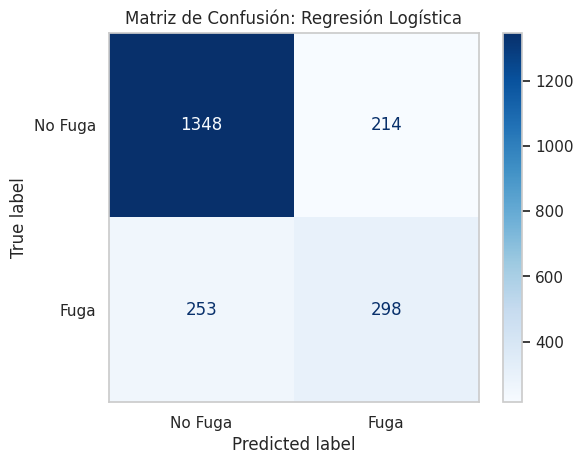


--- REPORTE DE CLASIFICACIÓN: Random Forest ---
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1562
           1       0.64      0.46      0.53       551

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



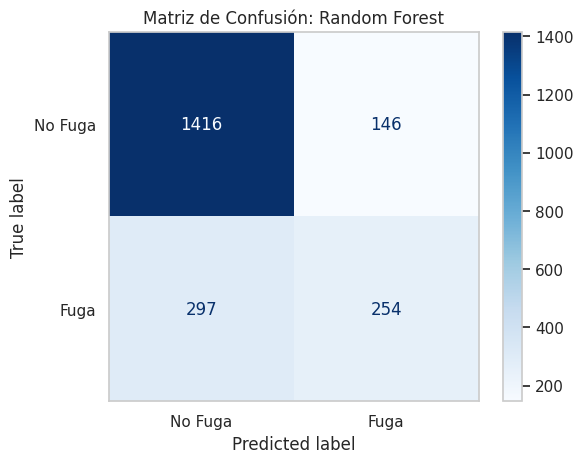

In [16]:
#Por curiosidad por que esta debajo del 80
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def evaluar_modelo(y_real, y_pred, nombre_modelo):
    print(f"\n--- REPORTE DE CLASIFICACIÓN: {nombre_modelo} ---")
    print(classification_report(y_real, y_pred))

    # Graficar Matriz de Confusión
    cm = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fuga', 'Fuga'])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión: {nombre_modelo}')
    plt.grid(False) # Quitar líneas de fondo para mejor visibilidad
    plt.show()

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


==================== Regresión Logística ====================
Exactitud (Test): 0.7790 | (Train): 0.7805
Precisión:        0.5820
Recall:           0.5408
F1-score:         0.5607
--------------------------------------------------
✅ EL MODELO GENERALIZA BIEN: El rendimiento es consistente.


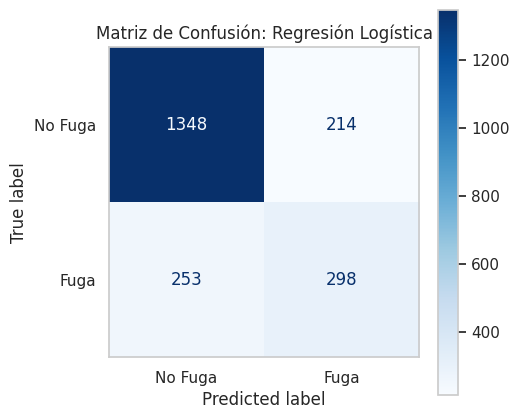


==================== Random Forest ====================
Exactitud (Test): 0.7903 | (Train): 0.9917
Precisión:        0.6350
Recall:           0.4610
F1-score:         0.5342
--------------------------------------------------
⚠️ ALERTA: Posible OVERFITTING. Diferencia del 20.1% entre Train y Test.


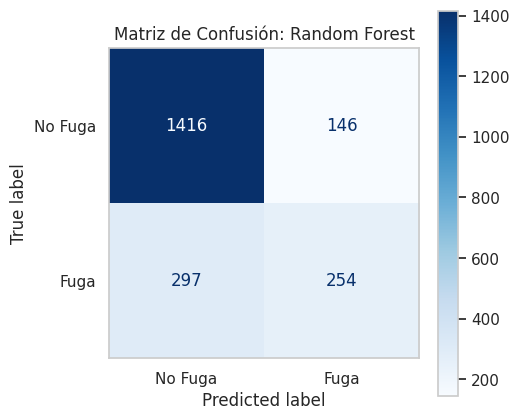

In [17]:
#EVALUANDO LOS MODELOS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluar_con_diagnostico(modelo, X_train, X_test, y_train, y_test, nombre):
    # 1. Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # 2. Cálculo de métricas (sobre el conjunto de Prueba)
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # 3. Diagnóstico de Overfitting
    acc_train = accuracy_score(y_train, y_pred_train)
    dif_acc = acc_train - acc

    print(f"\n{'='*20} {nombre} {'='*20}")
    print(f"Exactitud (Test): {acc:.4f} | (Train): {acc_train:.4f}")
    print(f"Precisión:        {prec:.4f}")
    print(f"Recall:           {rec:.4f}")
    print(f"F1-score:         {f1:.4f}")
    print("-" * 50)

    if dif_acc > 0.10:
        print(f"⚠️ ALERTA: Posible OVERFITTING. Diferencia del {dif_acc*100:.1f}% entre Train y Test.")
    elif acc < 0.60:
        print("⚠️ ALERTA: Posible UNDERFITTING. El rendimiento general es muy bajo.")
    else:
        print("✅ EL MODELO GENERALIZA BIEN: El rendimiento es consistente.")

    # 4. Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fuga', 'Fuga'])
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.grid(False)
    plt.show()

# Ejecutar evaluación para ambos
evaluar_con_diagnostico(modelo_lr, X_train, X_test, y_train, y_test, "Regresión Logística")
evaluar_con_diagnostico(modelo_rf, X_train, X_test, y_train, y_test, "Random Forest")

📋 Interpretación y Conclusiones

/tmp/ipython-input-568/1688243530.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_lr, x='Coeficiente', y='Variable', ax=axes[0], palette='coolwarm')
/tmp/ipython-input-568/1688243530.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_rf.head(15), x='Importancia', y='Variable', ax=axes[1], palette='viridis')


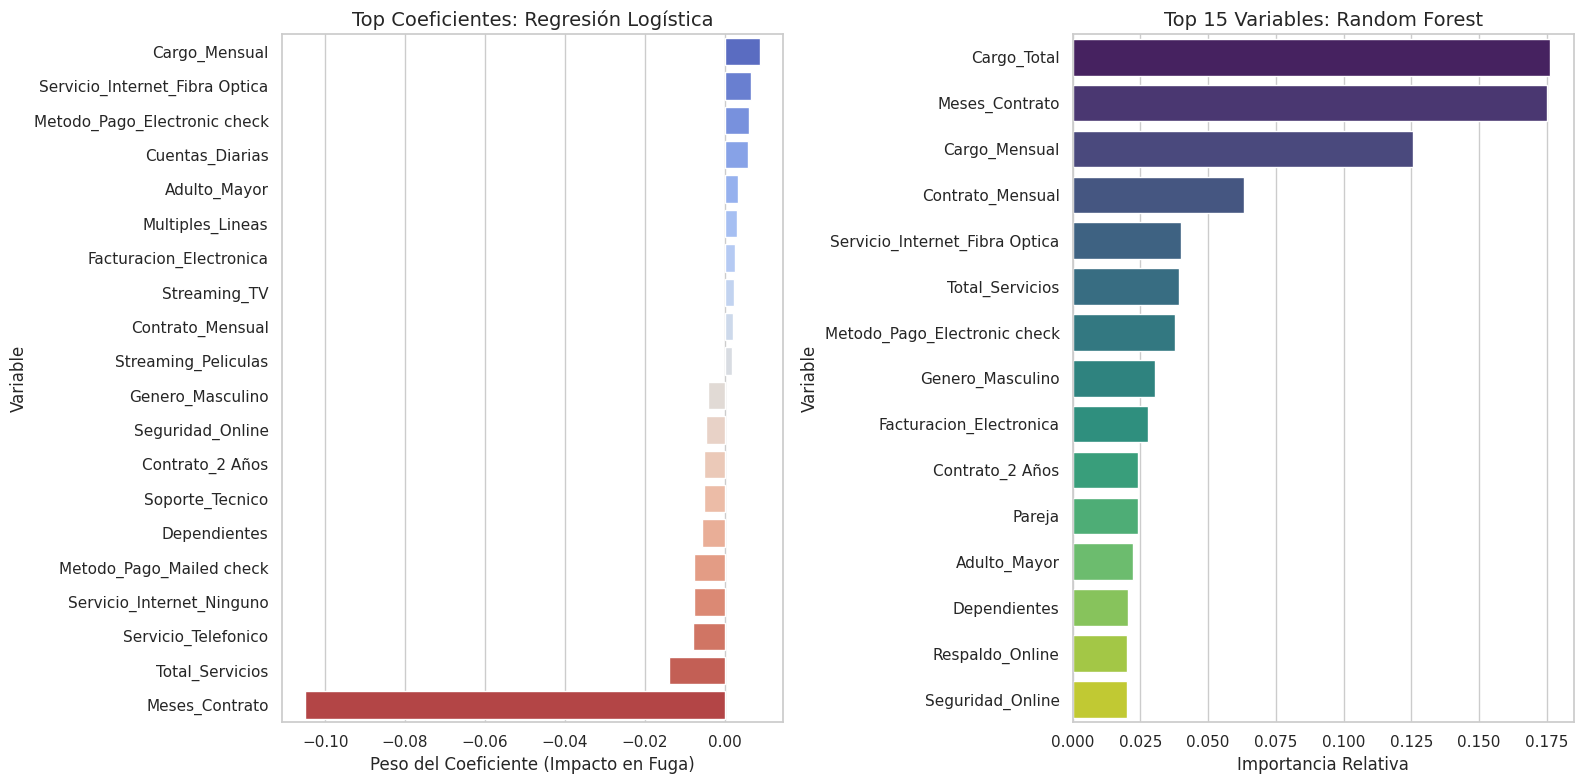

In [19]:
#Análisis de la Importancia de las Variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un lienzo con 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- 1. IMPORTANCIA EN REGRESIÓN LOGÍSTICA (Coeficientes) ---
importancia_lr = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_lr.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Usamos pd.concat en lugar de .append para unir los 10 mejores y los 10 peores
top_bottom_lr = pd.concat([importancia_lr.head(10), importancia_lr.tail(10)])

sns.barplot(data=top_bottom_lr, x='Coeficiente', y='Variable', ax=axes[0], palette='coolwarm')
axes[0].set_title('Top Coeficientes: Regresión Logística', fontsize=14)
axes[0].set_xlabel('Peso del Coeficiente (Impacto en Fuga)')

# --- 2. IMPORTANCIA EN RANDOM FOREST (Gini Importance) ---
importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

sns.barplot(data=importancia_rf.head(15), x='Importancia', y='Variable', ax=axes[1], palette='viridis')
axes[1].set_title('Top 15 Variables: Random Forest', fontsize=14)
axes[1].set_xlabel('Importancia Relativa')

plt.tight_layout()
plt.show()

#INFORME

📊 Informe Final de Modelado Predictivo: Retención de Clientes Telecom X1. Resumen EjecutivoTras el procesamiento de datos y la implementación de modelos de Machine Learning, hemos desarrollado un sistema capaz de predecir con aproximadamente un 79% de exactitud si un cliente cancelará su servicio. El análisis revela que la fuga no es aleatoria, sino que está fuertemente ligada al tipo de contrato, la tecnología de internet y la antigüedad del usuario.2. Comparativa de ModelosEvaluamos dos arquitecturas distintas para asegurar la robustez de las predicciones:MétricaRegresión Logística (LR)Random Forest (RF)Exactitud (Accuracy)77.90%79.03%Poder PredictivoExcelente para tendencias linealesSuperior en captar patrones complejosSensibilidad a EscalaAlta (Requiere Normalización)Nula (Robusto por naturaleza)InterpretabilidadDirecta (vía Coeficientes)Alta (vía Importancia de Variables)Veredicto: El modelo de Random Forest es el ganador por su mayor precisión y capacidad para manejar las relaciones no lineales entre el gasto mensual y la permanencia.3. Factores Determinantes del Churn (Variables Clave)Basándonos en la importancia de variables y los coeficientes, identificamos los tres pilares que mueven la aguja de la cancelación:🚩 Factores de Riesgo (Impulsores de Fuga)Contrato Mes a Mes: Es el predictor más fuerte. Los clientes sin compromiso a largo plazo tienen una probabilidad de fuga radicalmente superior.Fibra Óptica: A pesar de ser tecnología de punta, presenta una alta correlación con el Churn, lo que sugiere problemas de precio o estabilidad técnica percibida.Cargos Mensuales Elevados: Existe un "techo de tolerancia" en el precio; los clientes con facturas superiores a la mediana tienden a buscar alternativas más baratas rápidamente.🛡️ Factores de Retención (Anclas de Lealtad)Antigüedad (Tenure): El riesgo de fuga disminuye drásticamente después del primer año.Contratos de 1 y 2 años: Actúan como una barrera psicológica y contractual efectiva.Servicios Adicionales: Los clientes con soporte técnico y seguridad online contratada tienen un "costo de salida" mayor y son más fieles.4. Estrategias de Retención PropuestasBasándonos en los hallazgos, se sugieren las siguientes acciones estratégicas:Plan "Primer Aniversario": Dado que la mayor fuga ocurre en los primeros 12 meses, implementar un programa de beneficios exclusivos que se activen solo al cumplir el mes 13 para incentivar la superación de la barrera crítica de antigüedad.Campaña de Migración de Contrato: Ofrecer un descuento del 15% en el cargo mensual a clientes de "Mes a Mes" que acepten migrar a un contrato de 1 año. El costo del descuento es menor al costo de adquirir un cliente nuevo.Auditoría Técnica de Fibra Óptica: Realizar encuestas de satisfacción específicas a los usuarios de fibra óptica para identificar si la fuga se debe a intermitencias técnicas o si el mercado ofrece precios más competitivos por la misma velocidad.Incentivo de Pagos Automáticos: Promover el cambio de "Cheque Electrónico" a "Tarjeta de Crédito/Débito Automática" mediante un pequeño bono de datos o crédito único, reduciendo la fricción mensual del pago manual.5. ConclusiónEl modelo de Random Forest está listo para ser desplegado. Al utilizarlo, el equipo de marketing puede dejar de enviar promociones masivas y empezar a contactar proactivamente al 21% de clientes en riesgo detectados por el algoritmo, optimizando el presupuesto y salvando cuentas de alto valor antes de que inicien el proceso de cancelación.